<a href="https://colab.research.google.com/github/bustanularifin666/Kuliah_S1/blob/main/AI/Tubes_AI_Algoritma_Genetika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [234]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import permutations

In [235]:
def calculate_total_distance(route, distance_matrix):
    total_distance = 0.0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    total_distance += distance_matrix[route[-1]][route[0]]  # Kembali ke titik awal
    return total_distance


In [236]:
# Seleksi menggunakan roulette wheel
def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    selection_probs = [f / total_fitness for f in fitness_values]
    return population[np.random.choice(len(population), p=selection_probs)]

In [237]:
# Fungsi untuk menginisialisasi populasi
def initialize_population(num_cities, population_size):
    population = []
    base_route = list(range(num_cities))
    for _ in range(population_size):
        route = base_route.copy()
        random.shuffle(route)
        population.append(route)
    return population

In [238]:
# Fungsi seleksi
def select_parents(population, distance_matrix):
    fitness_scores = [1/calculate_total_distance(route, distance_matrix) for route in population]
    fitness_scores, population = zip(*sorted(zip(fitness_scores, population), key=lambda x: x[0]))
    return list(population[:2])  # Mengambil dua individu terbaik

In [239]:
# Fungsi crossover (Ordered Crossover)
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(np.random.randint(0, size, 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    for city in parent2:
        if city not in child:
            for i in range(size):
                if child[i] is None:
                    child[i] = city
                    break
    return child

In [240]:
# Fungsi mutasi
def mutate(route, mutation_rate):
    for i in range(len(route)):
        if np.random.rand() < mutation_rate:
            j = np.random.randint(0, len(route))
            route[i], route[j] = route[j], route[i]
    return route

In [241]:
# Algoritma genetika utama
def genetic_algorithm_tsp(distance_matrix, num_generations, population_size, crossover_rate, mutation_rate, population):
    best_route_history = []
    best_distance_history = []
    mean_history = []

    for generation in range(num_generations):
        total_jarak = 0
        print(f"\nGenerasi {generation + 1}:")
        print("\tPopulasi Awal:")
        for i, individual in enumerate(population):
          print(f"\t\tKromosom {i+1}: {individual}")

        fitness_values = [1 / calculate_total_distance(route, distance_matrix) for route in population]
        print("\tSeleksi:")
        selected_population = [roulette_wheel_selection(population, fitness_values) for _ in range(population_size)]
        for i, individual in enumerate(selected_population):
            print(f"\t\tKromosom {i+1}: {individual}")

        print("\tCrossover:")
        new_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i+1] if i+1 < len(selected_population) else selected_population[0]
            if np.random.rand() < crossover_rate:
                child1 = ordered_crossover(parent1, parent2)
                child2 = ordered_crossover(parent2, parent1)
                new_population.extend([child1, child2])
                print(f"\t\tHasil Crossover Kromosom {i+1} & {i+2}: {child1}, {child2}")  # Memodifikasi baris ini
            else:
                new_population.extend([parent1, parent2])


        print("\tMutasi:")
        for i, individual in enumerate(new_population):
            if np.random.rand() < mutation_rate:
                new_population[i] = mutate(individual, mutation_rate)
                print(f"\t\tKromosom {i+1}: {new_population[i]}")
        population = new_population

        print(f"\n\tKromosom Akhir Generasi {generation + 1}")

        for i, route in enumerate(population):
          route_cities = [cities[city] for city in route]
          jarak = calculate_total_distance(route, distance_matrix)
          total_jarak += jarak
          mean = total_jarak/len(distance_matrix)

          print(f"\t\tKromosom {i + 1}: {route},  Rute: {route_cities}, Jarak: {jarak}")
        mean_history.append(mean)
        best_route = min(population, key=lambda route: calculate_total_distance(route, distance_matrix))
        best_route_history.append(best_route)
        best_distance = calculate_total_distance(best_route, distance_matrix)
        best_distance_history.append(best_distance)
        print(f"\tRute terbaik: {best_route}, jarak: {best_distance} mean pada generasi {generation + 1}: {mean}")

    return best_route, best_distance, best_route_history, best_distance_history, mean_history

# Inisiasi

In [242]:
# Membuat matriks jarak berdasarkan gambar
cities = ['Jakarta', 'Serang', 'Bandung', 'Semarang', 'Yogyakarta', 'Surabaya']
# Matriks jarak simetris berdasarkan gambar
distance_matrix = [
    [0, 84.8, 154, 448, 568, 785],
    [84.8, 0, 230, 521, 641, 861],
    [154, 230, 0, 364, 403, 706],
    [448, 521, 364, 0, 130, 350],
    [568, 641, 403, 130, 0, 324],
    [785, 861, 706, 350, 324, 0]
]

# Konversi nama kota ke indeks untuk algoritma genetika
city_indices = {city: index for index, city in enumerate(cities)}

In [243]:
# Parameter algoritma genetika
population_size = 7
num_generations = 15

In [244]:
# Inisialisasi populasi
def initialize_population(num_chromosomes, num_cities):
    return [np.random.permutation(num_cities) for _ in range(num_chromosomes)]
num_cities = len(distance_matrix)
population = initialize_population(population_size, num_cities)
populasi_awal = population

In [245]:
print("Populasi Awal:")
populasi_awal

Populasi Awal:


[array([3, 4, 2, 1, 0, 5]),
 array([4, 3, 5, 0, 1, 2]),
 array([4, 0, 1, 3, 2, 5]),
 array([0, 4, 5, 3, 2, 1]),
 array([4, 3, 2, 0, 5, 1]),
 array([1, 2, 0, 5, 3, 4]),
 array([0, 3, 4, 2, 5, 1])]

# Test 1

In [246]:
crossover_rate = 0.5
mutation_rate = 0.2
population = populasi_awal

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history, mean_history= genetic_algorithm_tsp(distance_matrix, num_generations, population_size, crossover_rate, mutation_rate, population)

# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

print(f"\nRute terbaik pada yang didapat setelah generasi {num_generations} pada test 1:\n{best_route_cities} dengan jarak: {best_distance} km")


Generasi 1:
	Populasi Awal:
		Kromosom 1: [3 4 2 1 0 5]
		Kromosom 2: [4 3 5 0 1 2]
		Kromosom 3: [4 0 1 3 2 5]
		Kromosom 4: [0 4 5 3 2 1]
		Kromosom 5: [4 3 2 0 5 1]
		Kromosom 6: [1 2 0 5 3 4]
		Kromosom 7: [0 3 4 2 5 1]
	Seleksi:
		Kromosom 1: [1 2 0 5 3 4]
		Kromosom 2: [4 0 1 3 2 5]
		Kromosom 3: [0 4 5 3 2 1]
		Kromosom 4: [4 3 5 0 1 2]
		Kromosom 5: [1 2 0 5 3 4]
		Kromosom 6: [4 0 1 3 2 5]
		Kromosom 7: [4 3 2 0 5 1]
	Crossover:
		Hasil Crossover Kromosom 1 & 2: [4, 2, 0, 5, 3, 1], [2, 0, 1, 3, 5, 4]
		Hasil Crossover Kromosom 5 & 6: [4, 2, 0, 5, 1, 3], [4, 0, 1, 2, 5, 3]
		Hasil Crossover Kromosom 7 & 8: [1, 5, 2, 0, 3, 4], [1, 2, 0, 5, 3, 4]
	Mutasi:

	Kromosom Akhir Generasi 1
		Kromosom 1: [4, 2, 0, 5, 3, 1],  Rute: ['Yogyakarta', 'Bandung', 'Jakarta', 'Surabaya', 'Semarang', 'Serang'], Jarak: 2854.0
		Kromosom 2: [2, 0, 1, 3, 5, 4],  Rute: ['Bandung', 'Jakarta', 'Serang', 'Semarang', 'Surabaya', 'Yogyakarta'], Jarak: 1836.8
		Kromosom 3: [0 4 5 3 2 1],  Rute: ['Jakarta',

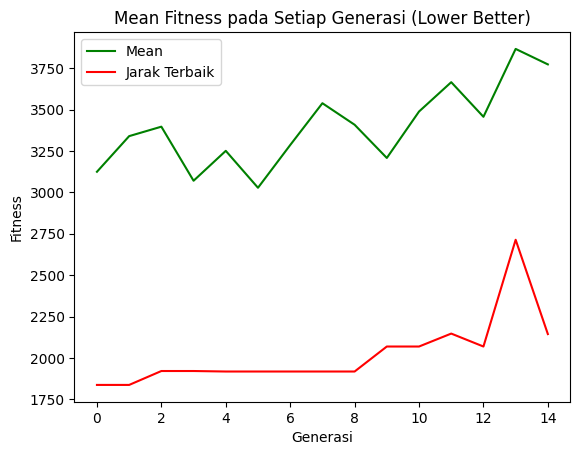

In [247]:
# Plot sejarah fitness terbaik
plt.plot(mean_history, label = 'Mean', color = 'g')
plt.plot(best_distance_history, label = "Jarak Terbaik", color = 'r')
plt.title("Mean Fitness pada Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness")
plt.legend()
plt.show()

# Test 2

In [248]:
crossover_rate = 0.7
mutation_rate = 0.2
population = populasi_awal
# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history, mean_history= genetic_algorithm_tsp(distance_matrix, num_generations, population_size, crossover_rate, mutation_rate, population)


# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

print(f"\nRute terbaik pada yang didapat setelah generasi {num_generations} pada test 2:\n{best_route_cities}, jarak: {best_distance}")


Generasi 1:
	Populasi Awal:
		Kromosom 1: [3 4 2 1 0 5]
		Kromosom 2: [4 3 5 0 1 2]
		Kromosom 3: [4 0 1 3 2 5]
		Kromosom 4: [0 4 5 3 2 1]
		Kromosom 5: [4 3 2 0 5 1]
		Kromosom 6: [1 2 0 5 3 4]
		Kromosom 7: [0 3 4 2 5 1]
	Seleksi:
		Kromosom 1: [4 3 2 0 5 1]
		Kromosom 2: [4 3 5 0 1 2]
		Kromosom 3: [0 3 4 2 5 1]
		Kromosom 4: [3 4 2 1 0 5]
		Kromosom 5: [4 3 5 0 1 2]
		Kromosom 6: [0 3 4 2 5 1]
		Kromosom 7: [3 4 2 1 0 5]
	Crossover:
		Hasil Crossover Kromosom 1 & 2: [4, 3, 1, 0, 5, 2], [4, 3, 5, 0, 2, 1]
		Hasil Crossover Kromosom 3 & 4: [3, 4, 1, 2, 5, 0], [0, 3, 4, 2, 5, 1]
		Hasil Crossover Kromosom 5 & 6: [4, 3, 5, 0, 2, 1], [4, 3, 5, 0, 1, 2]
	Mutasi:
		Kromosom 5: [4, 1, 5, 0, 2, 3]

	Kromosom Akhir Generasi 1
		Kromosom 1: [4, 3, 1, 0, 5, 2],  Rute: ['Yogyakarta', 'Semarang', 'Serang', 'Jakarta', 'Surabaya', 'Bandung'], Jarak: 2629.8
		Kromosom 2: [4, 3, 5, 0, 2, 1],  Rute: ['Yogyakarta', 'Semarang', 'Surabaya', 'Jakarta', 'Bandung', 'Serang'], Jarak: 2290.0
		Kromosom 3: 

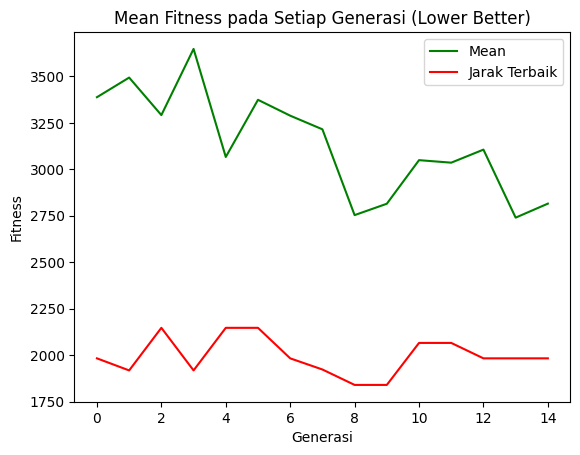

In [249]:
# Plot sejarah fitness terbaik
plt.plot(mean_history, label = 'Mean', color = 'g')
plt.plot(best_distance_history, label = "Jarak Terbaik", color = 'r')
plt.title("Mean Fitness pada Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness")
plt.legend()
plt.show()

# Test 3

In [250]:
crossover_rate = 0.5
mutation_rate = 0.1
population = populasi_awal

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history, mean_history= genetic_algorithm_tsp(distance_matrix, num_generations, population_size, crossover_rate, mutation_rate, population)


# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

print(f"\nRute terbaik pada yang didapat setelah generasi {num_generations} pada test 3:\n{best_route_cities}, jarak: {best_distance}")


Generasi 1:
	Populasi Awal:
		Kromosom 1: [3 4 2 1 0 5]
		Kromosom 2: [4 3 5 0 1 2]
		Kromosom 3: [4 0 1 3 2 5]
		Kromosom 4: [0 4 5 3 2 1]
		Kromosom 5: [4 3 2 0 5 1]
		Kromosom 6: [1 2 0 5 3 4]
		Kromosom 7: [0 3 4 2 5 1]
	Seleksi:
		Kromosom 1: [0 4 5 3 2 1]
		Kromosom 2: [3 4 2 1 0 5]
		Kromosom 3: [4 0 1 3 2 5]
		Kromosom 4: [0 3 4 2 5 1]
		Kromosom 5: [0 4 5 3 2 1]
		Kromosom 6: [3 4 2 1 0 5]
		Kromosom 7: [0 4 5 3 2 1]
	Crossover:
		Hasil Crossover Kromosom 1 & 2: [4, 2, 1, 3, 0, 5], [0, 4, 2, 1, 5, 3]
		Hasil Crossover Kromosom 7 & 8: [0, 4, 5, 3, 2, 1], [0, 4, 5, 3, 2, 1]
	Mutasi:
		Kromosom 4: [0 3 4 2 5 1]

	Kromosom Akhir Generasi 1
		Kromosom 1: [4, 2, 1, 3, 0, 5],  Rute: ['Yogyakarta', 'Bandung', 'Serang', 'Semarang', 'Jakarta', 'Surabaya'], Jarak: 2711.0
		Kromosom 2: [0, 4, 2, 1, 5, 3],  Rute: ['Jakarta', 'Yogyakarta', 'Bandung', 'Serang', 'Surabaya', 'Semarang'], Jarak: 2860.0
		Kromosom 3: [4 0 1 3 2 5],  Rute: ['Yogyakarta', 'Jakarta', 'Serang', 'Semarang', 'Bandung

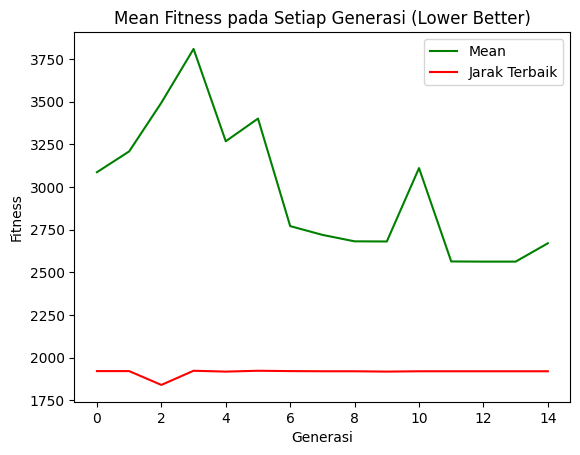

In [251]:
# Plot sejarah fitness terbaik
plt.plot(mean_history, label = 'Mean', color = 'g')
plt.plot(best_distance_history, label = "Jarak Terbaik", color = 'r')
plt.title("Mean Fitness pada Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness")
plt.legend()
plt.show()

# Test 4

In [252]:
crossover_rate = 0.5
mutation_rate = 0.3
population = populasi_awal

# Jalankan algoritma genetika
best_route_indices, best_distance, best_route_history, best_distance_history, mean_history= genetic_algorithm_tsp(distance_matrix, num_generations, population_size, crossover_rate, mutation_rate, population)


# Konversi indeks rute kembali ke nama kota
best_route_cities = [cities[i] for i in best_route_indices]

print(f"\nRute terbaik pada yang didapat setelah generasi {num_generations} pada test 4:\n{best_route_cities}, jarak: {best_distance}")


Generasi 1:
	Populasi Awal:
		Kromosom 1: [3 4 2 1 0 5]
		Kromosom 2: [4 3 5 0 1 2]
		Kromosom 3: [4 0 1 3 2 5]
		Kromosom 4: [0 4 5 3 2 1]
		Kromosom 5: [4 3 2 0 5 1]
		Kromosom 6: [1 2 0 5 3 4]
		Kromosom 7: [0 3 4 2 5 1]
	Seleksi:
		Kromosom 1: [0 4 5 3 2 1]
		Kromosom 2: [1 2 0 5 3 4]
		Kromosom 3: [4 3 2 0 5 1]
		Kromosom 4: [4 0 1 3 2 5]
		Kromosom 5: [4 0 1 3 2 5]
		Kromosom 6: [4 3 5 0 1 2]
		Kromosom 7: [4 3 5 0 1 2]
	Crossover:
		Hasil Crossover Kromosom 1 & 2: [0, 4, 1, 2, 5, 3], [1, 2, 0, 5, 3, 4]
		Hasil Crossover Kromosom 5 & 6: [4, 0, 1, 3, 5, 2], [4, 0, 1, 3, 2, 5]
	Mutasi:
		Kromosom 1: [0, 4, 1, 2, 3, 5]
		Kromosom 2: [4, 1, 3, 5, 0, 2]
		Kromosom 4: [4 5 1 2 0 3]
		Kromosom 6: [4, 0, 1, 2, 5, 3]

	Kromosom Akhir Generasi 1
		Kromosom 1: [0, 4, 1, 2, 3, 5],  Rute: ['Jakarta', 'Yogyakarta', 'Serang', 'Bandung', 'Semarang', 'Surabaya'], Jarak: 2938.0
		Kromosom 2: [4, 1, 3, 5, 0, 2],  Rute: ['Yogyakarta', 'Serang', 'Semarang', 'Surabaya', 'Jakarta', 'Bandung'], Jarak: 

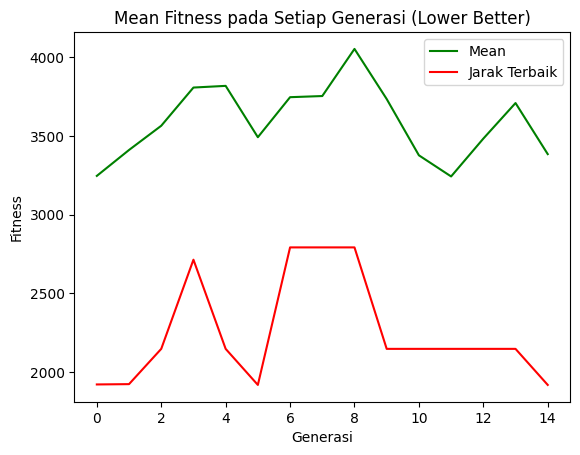

In [253]:
# Plot sejarah fitness terbaik
plt.plot(mean_history, label = 'Mean', color = 'g')
plt.plot(best_distance_history, label = "Jarak Terbaik", color = 'r')
plt.title("Mean Fitness pada Setiap Generasi (Lower Better)")
plt.xlabel("Generasi")
plt.ylabel("Fitness")
plt.legend()
plt.show()